<a href="https://colab.research.google.com/github/YakovDeLeon/ML_Course_PT/blob/main/Hometasks/ML_PTCourse_MicroHT1_diamonds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Микро-ДЗ 1: Знакомство с машинным обучением

## Описание задачи и загрузка данных

В этом задании вам нужно обучить линейную регрессию для предсказания стоимости домов в Калифорнии.

Альтернативная задача: прогноз стоимости алмазов.

Рекомендуем решать ее после выполнения этого ноутбука. Предоставим только данные, а пайплайн надо будет воспроизвести самостоятельно.

[Ссылка на данные.](https://raw.githubusercontent.com/aiedu-courses/stepik_eda_and_dev_tools/main/datasets/diamonds_good.csv)

Загружаем необходимые библиотеки.

In [1]:
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_california_housing

Фиксируем `random_state` для воспроизводимости случайных значений.

In [2]:
RANDOM_STATE = 42

Загрузим данные и сформируем из них матрицу объект-признак `X` и вектор `y`, содержащий целевую переменную.

In [6]:
url = "https://raw.githubusercontent.com/aiedu-courses/stepik_eda_and_dev_tools/main/datasets/diamonds_good.csv"
df = pd.read_csv(url)

Посмотрим первые пять записей набора данных.

In [11]:
df.head()

,carat,cut,color,clarity,depth,table,price,'x','y','z'
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


In [59]:
df.shape

(52454, 10)

In [47]:
df.isnull().sum() # примерно 2 процента объектов имеют пропущенные признаки, удалим их

,0
carat,498
cut,0
color,0
clarity,0
depth,990
table,0
price,0
'x',0
'y',5
'z',0


In [48]:
df = df.dropna()
df.shape

(52454, 10)

Сформируем матрицу объект-признак `X` и вектор целевой переменной `y`.

In [72]:
X = df.drop(['price'], axis=1)
y = df['price']

X.head()

,carat,cut,color,clarity,depth,table,'x','y','z'
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75


## Задание 1

 Сколько строк и столбцов в матрице `X`?

In [73]:
X.shape

(52454, 9)

Посмотрим на зависимость стоимости алмазова (целевой переменной `y`) от признака `carat`
Для этого можно нарисовать диаграмму рассеяния.

Text(0, 0.5, 'price')

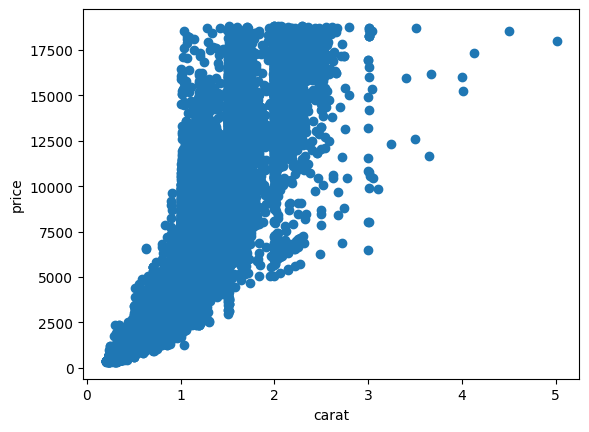

In [74]:
plt.scatter(X['carat'], y)
plt.xlabel('carat')
plt.ylabel('price')

По диаграмме видно, что чем больше `carat`, тем больше `price`, то есть видна прямая зависимость целевой переменной от признака `carat`.

## Задание 2

Постройте диаграмму рассеяния, отображающую зависимость целевой переменной от признака `depth`.
Какая это зависимость? На графике виден пик при глубине 55-70, можно сделать вывод что это самые встречаемые алмазы, однако прямой зависимости глубины алмаза на цену не просматривается

Text(0, 0.5, 'Diamond Price')

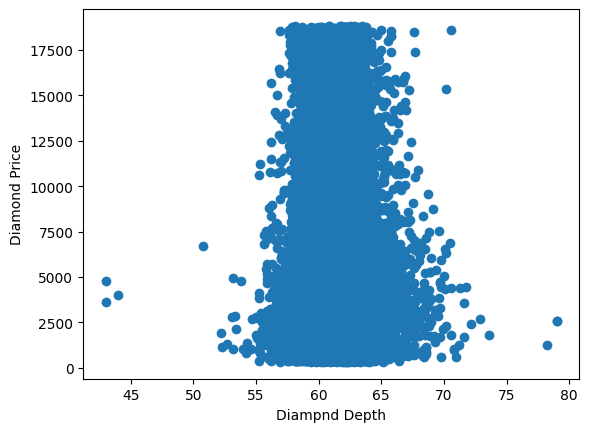

In [75]:
plt.scatter(X['depth'], y)
plt.xlabel('Diampnd Depth')
plt.ylabel('Diamond Price')

Ещё немного поисследуем данные. Полноценный разведочный анализ в рамках этого задания, конечно, не провести, но какие-то инструменты мы потрогаем.

Давайте построим тепловую карту корреляций.

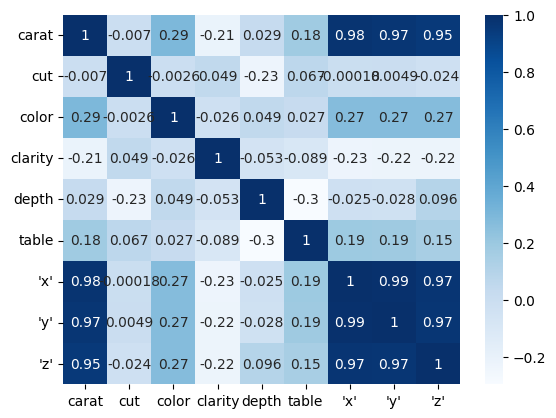

In [76]:
converted_X = X

for col in converted_X.select_dtypes(include=['object']).columns:
    converted_X[col] = converted_X[col].astype('category').cat.codes
corr = converted_X.corr()
sb.heatmap(corr, cmap="Blues", annot=True);

По этой матрице корреляций видно, что два наиболее зависимые признаки - это `carat` и (размеры алмаза?) `x`, `y`, `z`.

Но интереснее посмотреть, какой признак имеет наибольшую корреляцию с целевой переменной!

## Задание 3

Добавьте к матрице `X` столбец `y` и постройте матрицу корреляций.
Какой признак имеет наибольшую по модулю корреляцию с таргетом? (carat и размеры алмаза)
После выполнения задания удалите добавленный столбец `y` из матрицы `X`.

<Axes: >

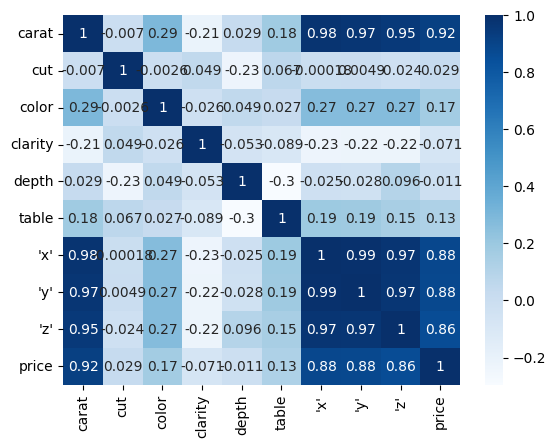

In [77]:
X_with_target = converted_X.assign(price=y)
corr_with_target = X_with_target.corr()
sb.heatmap(corr_with_target, cmap="Blues", annot=True)

Разбейте данные на тренировочную и тестовую часть (в тест отправьте 25% данных).

In [78]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(converted_X, y, test_size=0.25, random_state=RANDOM_STATE)

Xtrain.shape, Xtest.shape

((39340, 9), (13114, 9))

##Задание 4

Сколько объектов попали в тест? (13114)

Обучите линейную регрессию с параметрами по умолчанию на тренировочных данных и сделайте предсказание на тестовых данных.

In [79]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(Xtrain, ytrain)

from sklearn.metrics import mean_squared_error, r2_score

pred = model.predict(Xtest)

pred[:10]

array([18970.52126243,  1334.52413614,  3353.74254974,  1216.59066585,
       15358.486208  ,  9261.29699639,  4277.40437164,  1228.79873677,
        3231.59839262,  1629.61292931])

In [80]:
ytest[:10].values

array([16353.,   986.,  3502.,   911., 15706., 11956.,  4426.,   644.,
        2724.,  1758.])

## Задание 5

Вычислите значение метрик *MSE* и *RMSE* на тестовых данных.
Ответ округлите до десятых.

In [81]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(ytest, pred)
rmse = mse ** 0.5
print(f"MSE {round(mse, 1):.1f} RMSE {round(rmse, 1):.1f}")

MSE 1855993.8 RMSE 1362.3


In [82]:
r2_score(ytest, pred)

0.8814739801953692